In [1]:
using CSV, DataFrames, Dates
using PyCall
using CairoMakie
using StatsBase

@pyimport powerlaw as powlaw
so = pyimport("scipy.optimize")

PyObject <module 'scipy.optimize' from '/home/anicolin/.local/lib/python3.10/site-packages/scipy/optimize/__init__.py'>

In [2]:
data_in_question = "hourly_sea_level"
datetime = "datetime"
variable = "sea_level"

"sea_level"

In [3]:
path = "./data/"
filepath = path * data_in_question * ".csv"
df = CSV.read(filepath, DataFrame);

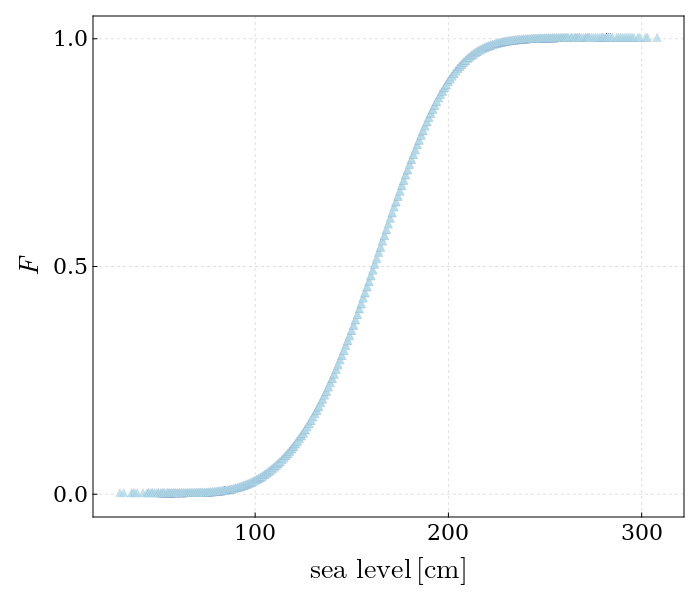

In [4]:
set_theme!(Theme(fonts=(; regular="CMU Serif")))

markers=[:utriangle, :diamond, :circle, :circle]
colors=[:lightblue, :lightgreen, :lightsalmon, :orchid]
line_colors=[:midnightblue, :green, :darkred, :purple]
i=1

########################################### ALL
# CCDF of all data scattered 
fig = Figure(resolution = (700, 600), font= "CMU Serif") 
ax1 = Axis(fig[1,1], xlabel = L"\text{sea level}\, \mathrm{[cm]}", ylabel = L"F", ylabelsize = 28, #xscale=log10, yscale=log10,   
    xlabelsize = 28, xgridstyle = :dash, ygridstyle = :dash, xtickalign = 1,
    xticksize = 5, ytickalign = 1, yticksize = 5 , xlabelpadding = 10, ylabelpadding = 10, xticklabelsize=22, yticklabelsize=22)


x_ccdf_original_data, y_ccdf_original_data = powlaw.cdf(df[!,variable])

#############################################################################################################################################################
# THE PLOTS 

sc = scatter!(ax1, x_ccdf_original_data, y_ccdf_original_data,
color=(colors[i], 0.75), strokewidth=0.05, strokecolor=(line_colors[i], 0.8), marker=markers[i], markersize=12)

# save("./results_article_plots/$(variable)_distribution_cdf.png", fig, px_per_unit=7)

fig

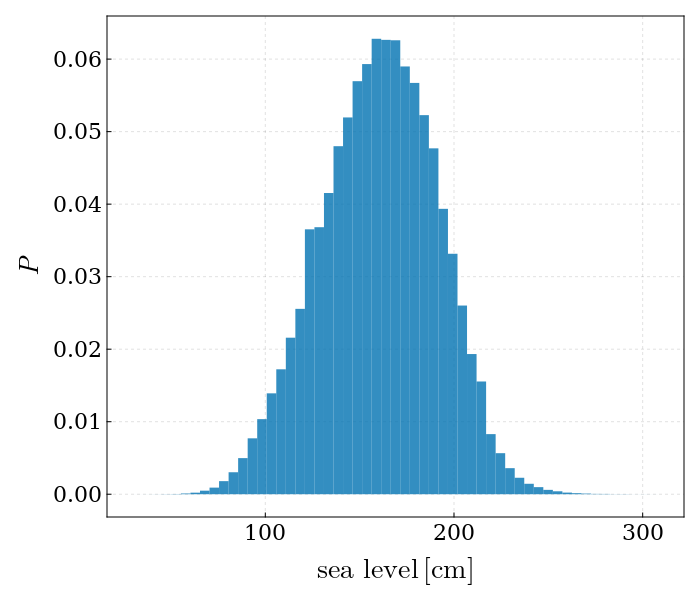

In [5]:
nb=55

set_theme!(Theme(fonts=(; regular="CMU Serif")))

markers=[:circle, :utriangle]
colors=[:lightblue, :lightgreen]
line_colors=[:midnightblue, :green]
i=1

########################################### ALL
# CCDF of all data scattered 
fig = Figure(resolution = (700, 600), font= "CMU Serif") 
ax1 = Axis(fig[1,1], xlabel = L"\text{sea level}\, \mathrm{[cm]}", ylabel = L"P", ylabelsize = 28,
    xlabelsize = 28, xgridstyle = :dash, ygridstyle = :dash, xtickalign = 1,
    xticksize = 5, ytickalign = 1, yticksize = 5 , xlabelpadding = 10, ylabelpadding = 10, xticklabelsize=22, yticklabelsize=22)
    
hist!(df[!,variable], bins=nb, normalization=:probability)

save("./results_article_plots/$(variable)_distribution_pdf.png", fig, px_per_unit=7)
fig